# Credit Card Fraud Detection

This notebook uses the credit card fraud detection dataset, and explores different binary classification models that can identify transactions as either fraudulent or valid, based on provided, *historical* data.

### Dataset Info

The payment fraud data set was downloaded from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/data). This has features and labels for thousands of credit card transactions, each of which is labeled as fraudulent or valid.

## Table of Contents
 1. [Set up Environment](#Set-up-Environment)
 2. [Load Libraries](#Load-Libraries)
 3. [Import Amazon Rewiew Dataset](#Load-Dataset)
 4. [EDA](#EDA)
 5. [Downsampling the dataset](#Downsample-dataset)
 6. [Convert Dataset into Binary Sentiment Analysis](#Convert-dataset-into-binary-sentiment-analysis)
 7. [Word Cloud](#Word-Cloud) 
 8. [Text Preprocessing Helper Function](#Text-Preprocessing-Helper-Functions)
 9. [Preprocess Texts](#Preprocess-Text)
 10.[Traditional NLP ML Techniques](#Traditional-NLP-ML-Techniques)
     - [Bag-of_Words Technique](#Bag-of-Words-Technique)
     - [TFidf Technique](#TF-idf-Technique)
     - [Word Vectors Technique](#Word-Vector-Technique)
 11. [Deep Learning Approach](#Deep-Learning-Approach)
     - [Create Tensorflow Dataset](#Create-TensorFlow-Dataset)
     - [Configure Dataset for Performance](#Configure-Dataset-for-Performance)
     - [Create the Text Encoder](#Create-the-Text-Encoder)
     - [Build Model](#Build-the-Model)
 12. [Model Comparisons](#)

### Load Libraries

In [33]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

## Loading Dataset

In [5]:
credit_df = pd.read_csv("creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# check for importantant information
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### EDA

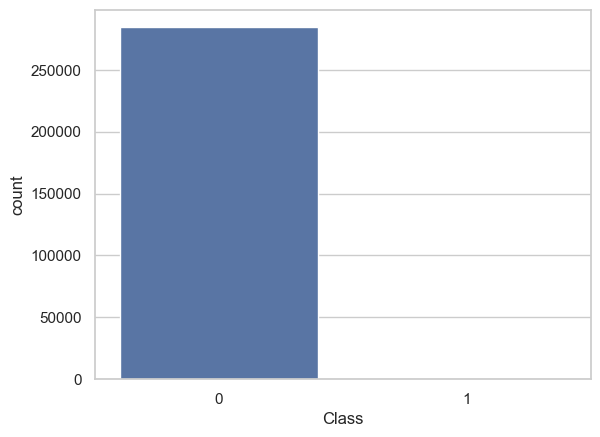

In [24]:
sns.set_theme(style="whitegrid")
sns.countplot(x = credit_df["Class"]);

Clearly, it can seen that there's distribution of the transaction id highly imbalanced. There's a high number of valid transactions compared to frudulent transactions. Out of all the transactions, fradulent transaction takes `0.17%`

Hence, we have to under-sample the majority class(es) by randomly picking samples with or without replacement using the imlearn library.

## Downsample the Dataset

### Split into train/test datasets
Before downsampling, we'll need to split the data into separate training and test sets.

In [26]:
# Get features
features = credit_df.iloc[:, :-1]
# Get labels
transactions = credit_df['Class']

In [31]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(features, transactions, train_size=0.2, random_state=42)

# Use counter to count number of samples in the target column
counter = Counter(y_train)
print('Before', counter)

Before Counter({0: 56856, 1: 105})


In [29]:
# Instantiate the RandomUndersampler()
RU = RandomUnderSampler()

# Undersample the majority
X_train_ru, y_train_ru = RU.fit_resample(x_train, y_train)
counter = Counter(y_train_ru)
print('After', counter)

After Counter({0: 105, 1: 105})


Let's create a helper function to check for performance

In [50]:
def evaluate(model, model_name = None):
    """
    Function that returns the classifiaction report and \n
    confusion matrix of a model
    """
    
    print(f"Classification report for {model_name}")
    print("----------------------------------------------------------------")
    print(classification_report(y_test, model.predict(x_test)))
    print("----------------------------------------------------------------")
    
    # Compute and display the confusion matrix
    cm = confusion_matrix(y_test, model.predict(x_test))
    cm_display = ConfusionMatrixDisplay(cm, display_labels = [False, True])
    cm_display.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    

# Classical Models

The following models will be used and compared together

1. Support Vector Machine
2. Gradient Boosting Classifier

In [58]:
# Instantiate the Support vector machine learning model
svm_clf = SVC(kernel="linear")

# Fit on the train and test set
svm_clf.fit(X_train_ru, y_train_ru);

Classification report for Support Vector Machine
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227459
           1       0.10      0.65      0.18       387

    accuracy                           0.99    227846
   macro avg       0.55      0.82      0.59    227846
weighted avg       1.00      0.99      0.99    227846

----------------------------------------------------------------


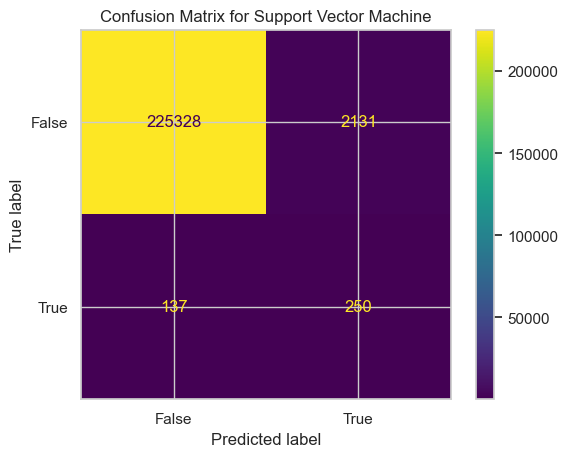

In [51]:
# Check for performance
evaluate(svm_clf, "Support Vector Machine")

In [107]:
ET = ExtraTreesClassifier()

ET.fit(X_train_ru, y_train_ru);

Classification report for ExtraTrees Classifier
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227459
           1       0.14      0.87      0.24       387

    accuracy                           0.99    227846
   macro avg       0.57      0.93      0.62    227846
weighted avg       1.00      0.99      0.99    227846

----------------------------------------------------------------


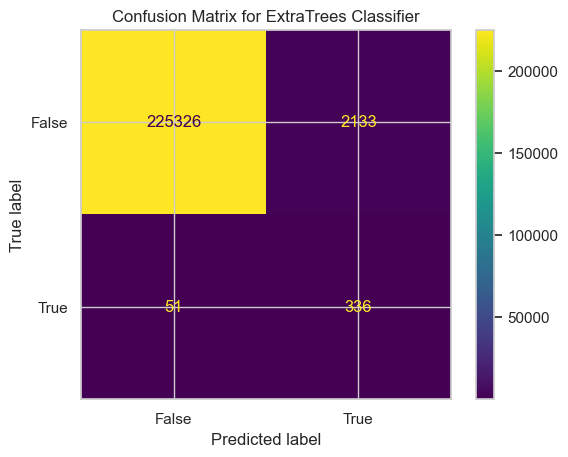

In [108]:
evaluate(ET, "ExtraTrees Classifier")

## Feature Importances

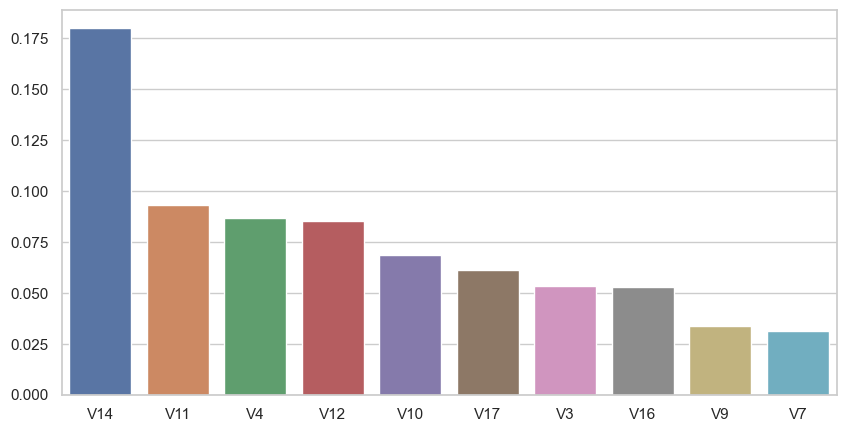

In [76]:
plt.figure(figsize=(10,5))
# get feature importance
feature_importance = pd.Series(ET.feature_importances_, index=X_train_ru.columns).nlargest(10)

sns.barplot(x =feature_importance.index, y = feature_importance.values);

**Observation**
- As seen the top predictor variables are `['V14', 'V11', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V9', 'V7']`. Lets retrain the ExtraTrees model and see if the same results can be achived.

In [145]:
# Use top 10 features to train new model
x_train_best = X_train_ru[['V14', 'V11', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V9', 'V7']]
x_test_best = x_test[['V14', 'V11', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V9', 'V7']]

In [148]:
# Train the model on the top features
ET_new = ExtraTreesClassifier()
ET_new.fit(x_train_best, y_train_ru);

Classification report for ExTraTrees
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227459
           1       0.10      0.87      0.18       387

    accuracy                           0.99    227846
   macro avg       0.55      0.93      0.59    227846
weighted avg       1.00      0.99      0.99    227846

----------------------------------------------------------------


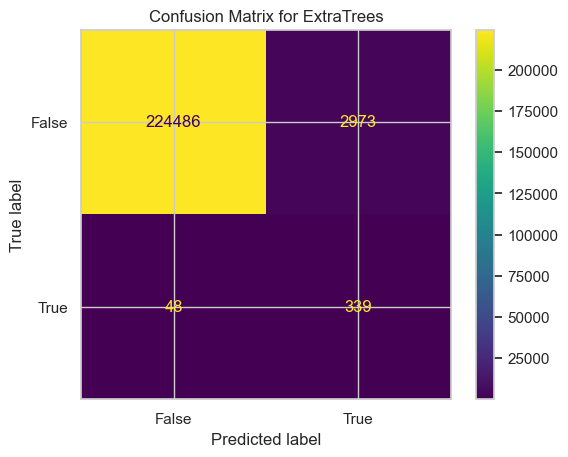

In [149]:
print(f"Classification report for ExTraTrees")
print("----------------------------------------------------------------")
print(classification_report(y_test, ET_new.predict(x_test_best)))
print("----------------------------------------------------------------")

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, ET.predict(x_test_best))
cm_display = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cm_display.plot()
plt.title(f"Confusion Matrix for ExtraTrees");

Clearly, very close results are achieved as when trained on the entire features

In [158]:
# Instantiate the Support vector machine learning model
svm = SVC(kernel="linear")

# Fit on the train and test set
svm.fit(x_train_best, y_train_ru);

Classification report for ExTraTrees
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227459
           1       0.06      0.89      0.11       387

    accuracy                           0.98    227846
   macro avg       0.53      0.93      0.55    227846
weighted avg       1.00      0.98      0.99    227846

----------------------------------------------------------------


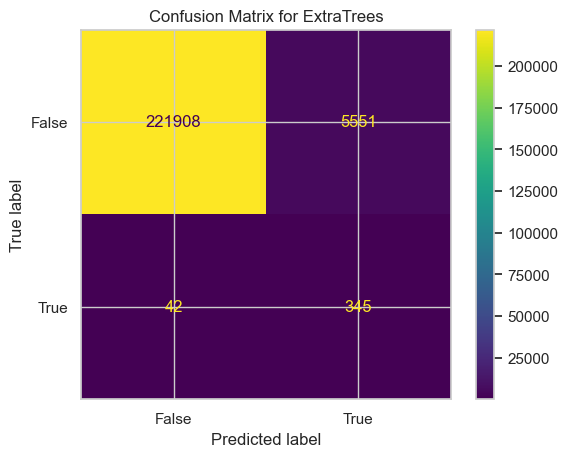

In [159]:
print(f"Classification report for ExTraTrees")
print("----------------------------------------------------------------")
print(classification_report(y_test, svm.predict(x_test_best)))
print("----------------------------------------------------------------")

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, svm.predict(x_test_best))
cm_display = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cm_display.plot()
plt.title(f"Confusion Matrix for ExtraTrees");

### Save Model

In [160]:
with open("ExtraTreesModel.pkl", "wb") as f:
    pickle.dump(ET_new, f)
    
with open("svm.pkl", "wb") as f:
    pickle.dump(svm, f)

In [156]:
# save the dataset with important features
x_train_best[['V14', 'V11', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V9', 'V7']].to_csv("features.csv", index=False)

## Model Comparison

The Etratrees classifier got a high accuracy, high precision and high recall for both classes, but still mis-classified fraudulent and valid data points. From the [Confusion Matrix](#ET-Performance), it can be seen that Gradient Boosting, classifying more than 100 points as false negatives (incorrectly labelled fraudulent transactions), 24 points as false positives (incorrectly labelled, valid transactions).

Since we want a model that will catch almost *all* cases of fraudulent transactions, even if it means a higher number of false positives(valid incorrectly labelled as fradulent), then we'd want as few **false negatives** as possible, hence we do not want to optimize for accuracy only. Instead, we want to optimize for a metric that can help us decrease the number of **false negatives**.